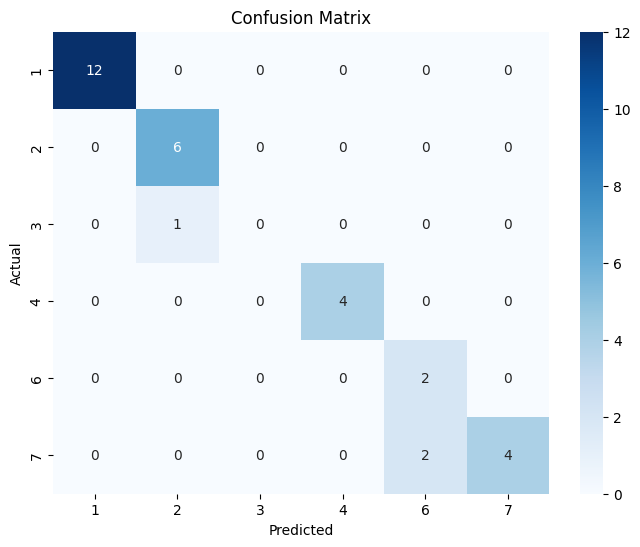


-------- Logistic Regression Evaluation --------

Accuracy: 0.903
Precision: 0.940
Recall: 0.903
Specificity: 1.000
F1 Score: 0.893


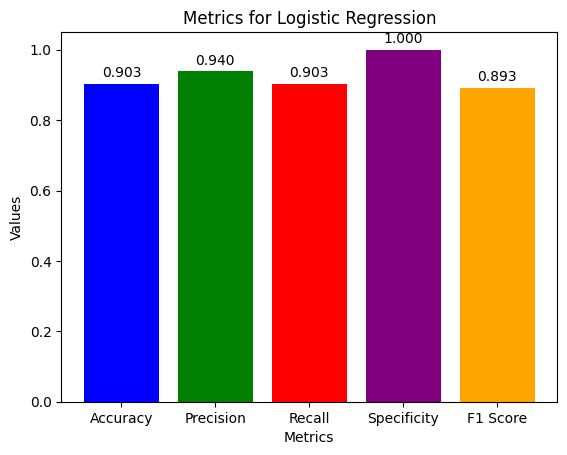

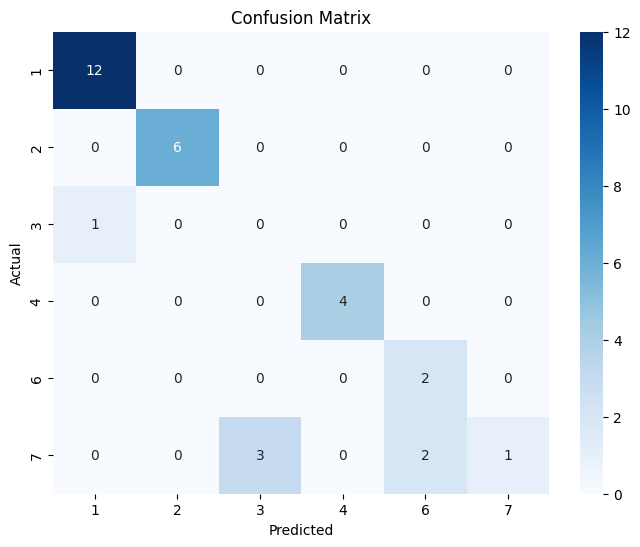


-------- K-Nearest Neighbors Evaluation --------

Accuracy: 0.806
Precision: 0.906
Recall: 0.806
Specificity: 1.000
F1 Score: 0.793


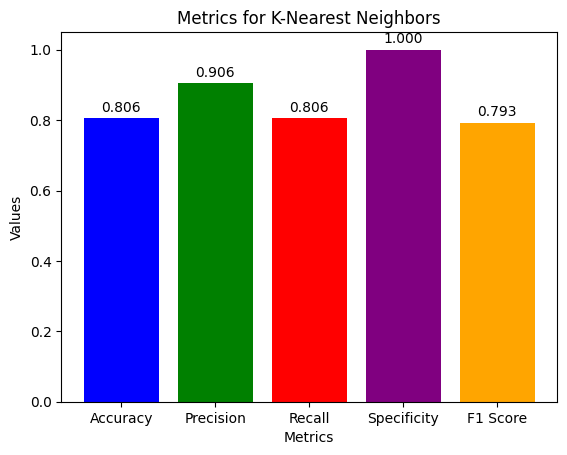

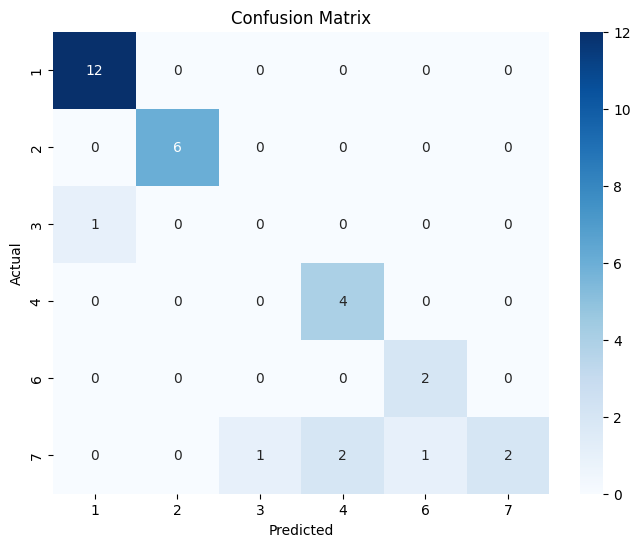


-------- Support Vector Machine Evaluation --------

Accuracy: 0.839
Precision: 0.873
Recall: 0.839
Specificity: 1.000
F1 Score: 0.817


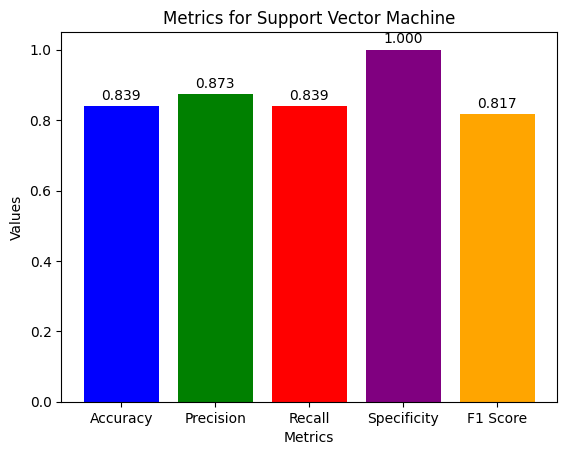

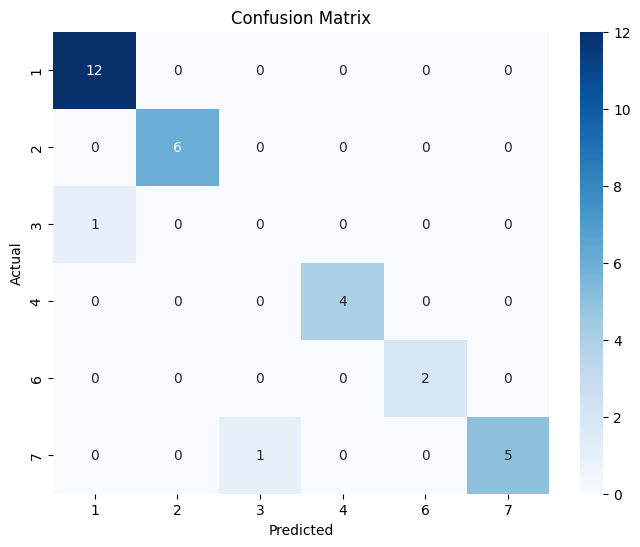


-------- Naive Bayes Evaluation --------

Accuracy: 0.935
Precision: 0.938
Recall: 0.935
Specificity: 1.000
F1 Score: 0.935


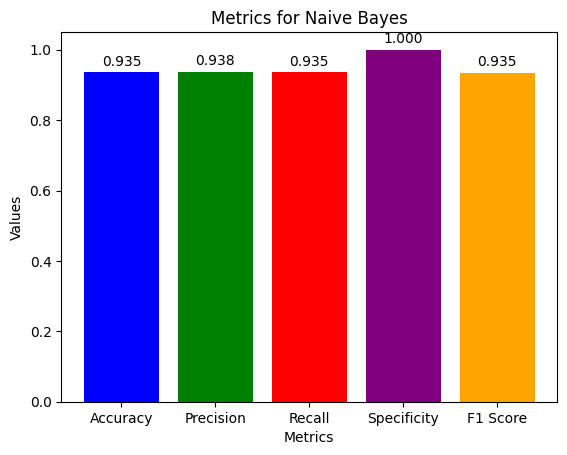

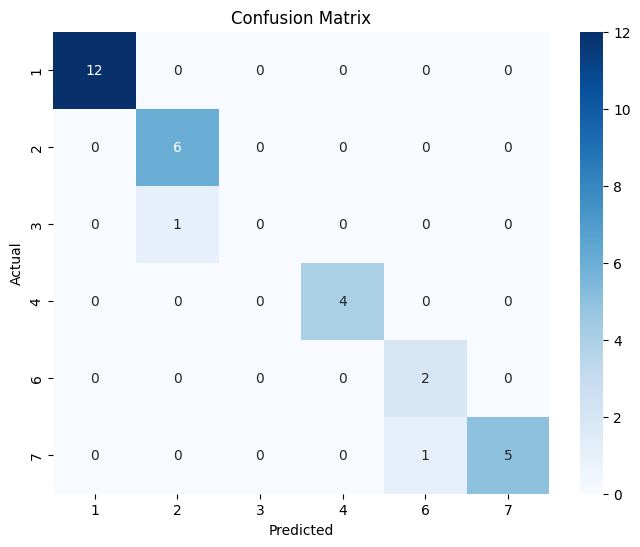


-------- MLP Evaluation --------

Accuracy: 0.935
Precision: 0.951
Recall: 0.935
Specificity: 1.000
F1 Score: 0.922


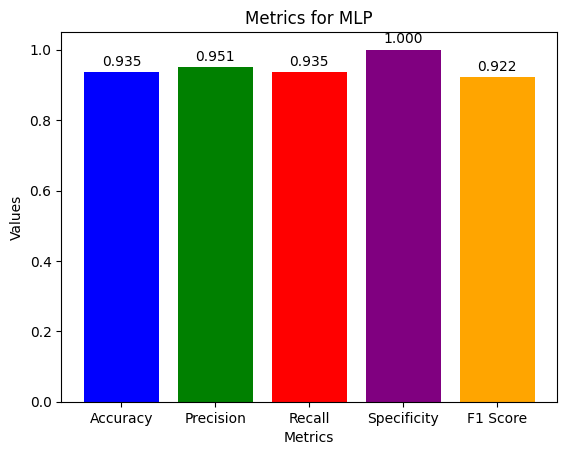

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def zoo():
    dataset = pd.read_csv('zoo.csv')
    X = dataset.drop(['animal_name','type'], axis=1)
    y = dataset['type']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    return X_train, X_test, y_train, y_test

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()[:4]
    specificity = tn / (tn + fp)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\n-------- {model_name} Evaluation --------\n")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"F1 Score: {f1:.3f}")

    metrics_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score']
    metrics_values = [accuracy, precision, recall, specificity, f1]

    plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.title(f'Metrics for {model_name}')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    for i, value in enumerate(metrics_values):
        plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')
    plt.show()

X_train, X_test, y_train, y_test = zoo()

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(C=1.0),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=(16,16), max_iter=1000)
}

for model_name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
